In [4]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sns

#libraries for label encoding
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

#for feature selection 
from sklearn.ensemble import ExtraTreesClassifier

#linear regression model
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn import metrics  

from scipy import stats

#Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler

In [5]:
#loading csv file
data =pd.read_csv("Downloads/hackathon_rentomter_nobroker.csv")
data

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent,deposit
0,ff8081815917971401591af8895032d0,BHK2,Jayanagara,2018-07-05 17:09:49,12.936601,77.576914,FAMILY,0,0,0,...,S,2.0,2,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORP_BORE,IF,1.0,22000,220000.0
1,ff80818157dbe1fb0157dc4aa07513dc,BHK2,Basaveshwar Nagar,2017-12-30 17:22:12,12.997989,77.545219,FAMILY,0,0,0,...,W,2.0,0,1.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,20000,200000.0
2,ff8081815d304406015d30edcd7c4f44,BHK3,"Jaya Nagar East,Jayanagar",2017-07-11 15:42:05,12.935696,77.587642,FAMILY,0,1,0,...,E,3.0,4,9.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORPORATION,AP,2.0,38000,250000.0
3,ff8081815b106986015b154d908f2ac2,BHK2,Murugeshpalya,2018-07-07 14:26:14,12.953507,77.656118,FAMILY,0,1,0,...,E,2.0,4,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",BOREWELL,AP,1.0,30000,300000.0
4,ff8081815e80b789015e84a7a42a62a3,BHK2,Whitefield,2017-09-27 12:19:28,12.968520,77.742436,ANYONE,1,1,1,...,E,2.0,1,9.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,26500,150000.0
5,ff80818162537f2d01625cfb76f37165,BHK2,HSR Layout,2018-03-25 18:15:19,12.921999,77.646238,FAMILY,0,0,0,...,N,2.0,1,4.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,AP,3.0,30000,175000.0
6,ff80818160792cc001608ec7b922154a,BHK3,Harlur,2018-07-26 21:01:47,12.909958,77.674755,FAMILY,0,0,0,...,W,6.0,0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",BOREWELL,GC,2.0,35500,216000.0
7,ff8081815bb9ae79015bbd6aae9b03b1,BHK2,Vijaya Nagar,2018-05-19 13:12:15,12.964160,77.518935,FAMILY,0,0,0,...,W,2.0,0,3.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,AP,1.0,15000,150000.0
8,ff808181622f11e901622f590ada0eb9,BHK1,Doddanekkundi,2018-03-20 17:58:57,12.970340,77.688801,FAMILY,0,0,0,...,E,1.0,1,3.0,"{""PARK"":false,""HK"":false,""LIFT"":false,""PB"":fal...",CORPORATION,IH,1.0,11000,50000.0
9,ff8081815dad8e0f015db114d5f90716,BHK2,BTM 2nd Stage,2017-08-18 17:00:23,12.909464,77.609353,ANYONE,0,0,0,...,E,2.0,1,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,1.0,14000,60000.0


DATA ANALYSIS

In [6]:
#determining count of each feature for training examples 
data.count()

id                 25000
type               25000
locality           25000
activation_date    25000
latitude           25000
longitude          25000
lease_type         25000
gym                25000
lift               25000
swimming_pool      25000
negotiable         25000
furnishing         25000
parking            25000
property_size      25000
property_age       25000
bathroom           25000
facing             25000
cup_board          25000
floor              25000
total_floor        25000
amenities          25000
water_supply       25000
building_type      25000
balconies          25000
rent               25000
deposit            25000
dtype: int64

In [7]:
#check for null values in dataset
data.isnull().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
deposit            0
dtype: int64

In [8]:
#determine the type of data for each feature
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 26 columns):
id                 25000 non-null object
type               25000 non-null object
locality           25000 non-null object
activation_date    25000 non-null object
latitude           25000 non-null float64
longitude          25000 non-null float64
lease_type         25000 non-null object
gym                25000 non-null int64
lift               25000 non-null int64
swimming_pool      25000 non-null int64
negotiable         25000 non-null int64
furnishing         25000 non-null object
parking            25000 non-null object
property_size      25000 non-null int64
property_age       25000 non-null float64
bathroom           25000 non-null int64
facing             25000 non-null object
cup_board          25000 non-null float64
floor              25000 non-null int64
total_floor        25000 non-null float64
amenities          25000 non-null object
water_supply       25000 non-nul

DATA CLEANING

In [9]:
#HANDLING CATEGORICAL VARIABLES

In [10]:
#Using label encoder to transform categorical data of locality feature into integer
le=preprocessing.LabelEncoder()
data['locality']=le.fit_transform(data['locality'])
data['locality'].head()

0    1061
1     419
2    1027
3    1443
4    2084
Name: locality, dtype: int32

In [11]:
#determining number of unique values in locality
a=np.unique(data['locality'])
a.shape

(2177,)

In [12]:
#applying label encoder to other features containing categorical data
data['type']=le.fit_transform(data['type'])
data['lease_type']=le.fit_transform(data['lease_type'])
data['furnishing']=le.fit_transform(data['furnishing'])
data['parking']=le.fit_transform(data['parking'])
data['facing']=le.fit_transform(data['facing'])
data['water_supply']=le.fit_transform(data['water_supply'])
data['building_type']=le.fit_transform(data['building_type'])

In [13]:
data.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent,deposit
0,ff8081815917971401591af8895032d0,1,1061,2018-07-05 17:09:49,12.936601,77.576914,3,0,0,0,...,4,2.0,2,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",2,2,1.0,22000,220000.0
1,ff80818157dbe1fb0157dc4aa07513dc,1,419,2017-12-30 17:22:12,12.997989,77.545219,3,0,0,0,...,7,2.0,0,1.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",1,3,0.0,20000,200000.0
2,ff8081815d304406015d30edcd7c4f44,2,1027,2017-07-11 15:42:05,12.935696,77.587642,3,0,1,0,...,0,3.0,4,9.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",1,0,2.0,38000,250000.0
3,ff8081815b106986015b154d908f2ac2,1,1443,2018-07-07 14:26:14,12.953507,77.656118,3,0,1,0,...,0,2.0,4,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",0,0,1.0,30000,300000.0
4,ff8081815e80b789015e84a7a42a62a3,1,2084,2017-09-27 12:19:28,12.968520,77.742436,0,1,1,1,...,0,2.0,1,9.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",2,0,2.0,26500,150000.0


In [14]:
#working with amenities feature
data['amenities'].head()

0    {"LIFT":false,"GYM":false,"INTERNET":false,"AC...
1    {"LIFT":false,"GYM":false,"INTERNET":false,"AC...
2    {"LIFT":true,"GYM":false,"INTERNET":true,"AC":...
3    {"LIFT":true,"GYM":false,"INTERNET":true,"AC":...
4    {"LIFT":true,"GYM":true,"INTERNET":true,"AC":f...
Name: amenities, dtype: object

In [15]:
#replacing true and false in amenities feature with 1 and 0 respectively
data['amenities']=data['amenities'].str.replace('false','0')
data['amenities']=data['amenities'].str.replace('true','1') 
data['amenities'].head()

0    {"LIFT":0,"GYM":0,"INTERNET":0,"AC":0,"CLUB":0...
1    {"LIFT":0,"GYM":0,"INTERNET":0,"AC":0,"CLUB":0...
2    {"LIFT":1,"GYM":0,"INTERNET":1,"AC":0,"CLUB":1...
3    {"LIFT":1,"GYM":0,"INTERNET":1,"AC":0,"CLUB":0...
4    {"LIFT":1,"GYM":1,"INTERNET":1,"AC":0,"CLUB":1...
Name: amenities, dtype: object

In [16]:
#splitting the amenities feature into various columns
df1 = data
df1["amenities"] = df1["amenities"].apply(lambda x : dict(eval(str(x)))) #parses the string
df2 = df1["amenities"].apply(pd.Series )
df2.head()

,LIFT,GYM,INTERNET,AC,CLUB,INTERCOM,POOL,CPA,FS,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [17]:
#concatenating the above columns in the original dataset
data = pd.concat([data, df2], axis=1)
data.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,ff8081815917971401591af8895032d0,1,1061,2018-07-05 17:09:49,12.936601,77.576914,3,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ff80818157dbe1fb0157dc4aa07513dc,1,419,2017-12-30 17:22:12,12.997989,77.545219,3,0,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ff8081815d304406015d30edcd7c4f44,2,1027,2017-07-11 15:42:05,12.935696,77.587642,3,0,1,0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
3,ff8081815b106986015b154d908f2ac2,1,1443,2018-07-07 14:26:14,12.953507,77.656118,3,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,ff8081815e80b789015e84a7a42a62a3,1,2084,2017-09-27 12:19:28,12.968520,77.742436,0,1,1,1,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [18]:
#view all columns in the dataset now
data.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent', 'deposit', 'LIFT',
       'GYM', 'INTERNET', 'AC', 'CLUB', 'INTERCOM', 'POOL', 'CPA', 'FS',
       'SERVANT', 'SECURITY', 'SC', 'GP', 'PARK', 'RWH', 'STP', 'HK', 'PB',
       'VP'],
      dtype='object')

In [19]:
#dropping repeated columns
data.drop(['amenities','GYM','LIFT','POOL'],axis=1,inplace=True)

In [20]:
#view all columns in the dataset now
data.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'water_supply',
       'building_type', 'balconies', 'rent', 'deposit', 'INTERNET', 'AC',
       'CLUB', 'INTERCOM', 'CPA', 'FS', 'SERVANT', 'SECURITY', 'SC', 'GP',
       'PARK', 'RWH', 'STP', 'HK', 'PB', 'VP'],
      dtype='object')

In [21]:
#checking null values in the dataset for the added columns
data.isnull().sum()

id                    0
type                  0
locality              0
activation_date       0
latitude              0
longitude             0
lease_type            0
gym                   0
lift                  0
swimming_pool         0
negotiable            0
furnishing            0
parking               0
property_size         0
property_age          0
bathroom              0
facing                0
cup_board             0
floor                 0
total_floor           0
water_supply          0
building_type         0
balconies             0
rent                  0
deposit               0
INTERNET              0
AC                    0
CLUB               1283
INTERCOM              0
CPA                1283
FS                    0
SERVANT            1283
SECURITY              0
SC                    0
GP                 1283
PARK                  0
RWH                1283
STP                1283
HK                    0
PB                    0
VP                 1283
dtype: int64

In [22]:
#filling null values in columns with 0 as no information about these amenities is given
data[['CLUB','CPA','GP','RWH','SERVANT','STP','VP']] = data[['CLUB','CPA','GP','RWH','SERVANT','STP','VP']].fillna(0,axis = 1,inplace=False)

In [23]:
data.isnull().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
water_supply       0
building_type      0
balconies          0
rent               0
deposit            0
INTERNET           0
AC                 0
CLUB               0
INTERCOM           0
CPA                0
FS                 0
SERVANT            0
SECURITY           0
SC                 0
GP                 0
PARK               0
RWH                0
STP                0
HK                 0
PB                 0
VP                 0
dtype: int64

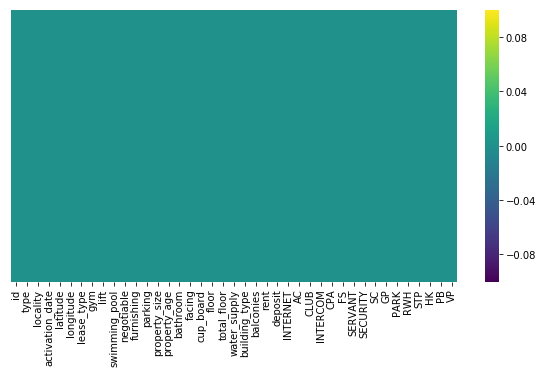

In [24]:
#null values via heatmap
pt.figure(figsize=(10,5))
sns.heatmap(data.isnull(),yticklabels=False,cmap = 'viridis')

FEATURE ENGINEERING

In [25]:
data.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,ff8081815917971401591af8895032d0,1,1061,2018-07-05 17:09:49,12.936601,77.576914,3,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ff80818157dbe1fb0157dc4aa07513dc,1,419,2017-12-30 17:22:12,12.997989,77.545219,3,0,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ff8081815d304406015d30edcd7c4f44,2,1027,2017-07-11 15:42:05,12.935696,77.587642,3,0,1,0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
3,ff8081815b106986015b154d908f2ac2,1,1443,2018-07-07 14:26:14,12.953507,77.656118,3,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,ff8081815e80b789015e84a7a42a62a3,1,2084,2017-09-27 12:19:28,12.968520,77.742436,0,1,1,1,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [26]:
#dropping id as rent is not dependent on it
#dropping activation_date as we already have property age feature
data.drop(["id","activation_date"],axis=1,inplace=True)

In [27]:
data.head()

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,1,1061,12.936601,77.576914,3,0,0,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,419,12.997989,77.545219,3,0,0,0,1,2,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,1027,12.935696,77.587642,3,0,1,0,0,2,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
3,1,1443,12.953507,77.656118,3,0,1,0,1,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1,2084,12.968520,77.742436,0,1,1,1,1,2,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.02592357 0.06786597 0.07094585 0.07632187 0.02555196 0.0064257
 0.00691487 0.00494366 0.01964454 0.0131961  0.02137852 0.07178096
 0.06287817 0.0214614  0.04806117 0.04080113 0.05056584 0.05245103
 0.03724259 0.01946334 0.03892587 0.02657867 0.00570052 0.00570685
 0.00861467 0.01589751 0.00917419 0.00446148 0.01181025 0.026514
 0.00944714 0.02469122 0.01809032 0.01376716 0.01293287 0.00728594
 0.01658312]


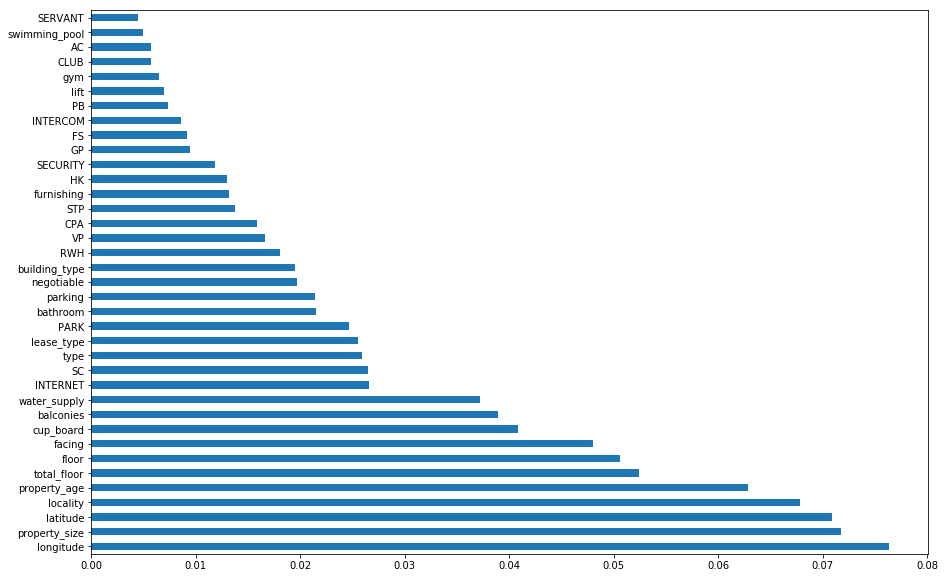

In [28]:
#Using ExtraTreesClassifier for predicting the importance of features for rent determination
pt.figure(figsize=(15,10))
x=data.drop(['rent','deposit'],axis=1)
y=data['rent']
model=ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances=pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(37).plot(kind='barh') #37 columns in total in x
pt.show()

In [29]:
#plotting various plots for understanding features

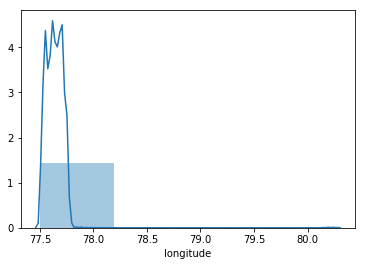

In [30]:
sns.distplot(data['longitude'], bins=4)
pt.show()

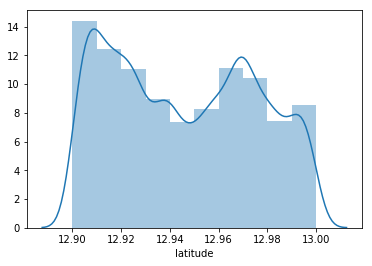

In [31]:
sns.distplot(data['latitude'], bins=10)
pt.show()

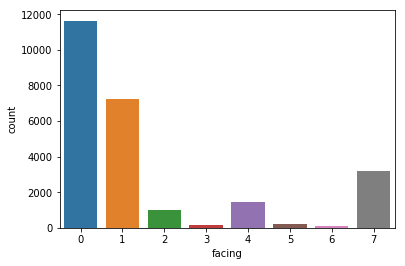

In [32]:
sns.countplot(x='facing',data=data)

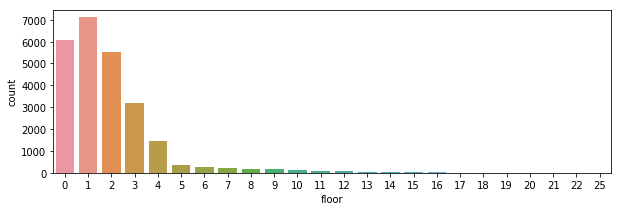

In [33]:
pt.figure(figsize=(10,3))
sns.countplot(x='floor',data=data)

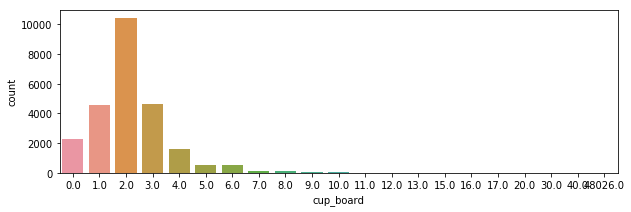

In [34]:
pt.figure(figsize=(10,3))
sns.countplot(x='cup_board',data=data)

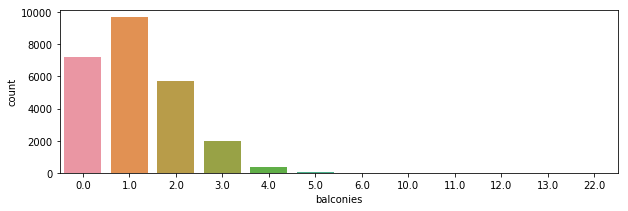

In [35]:
pt.figure(figsize=(10,3))
sns.countplot(x='balconies',data=data)

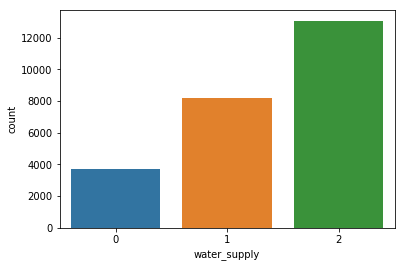

In [36]:
sns.countplot(x='water_supply',data=data)

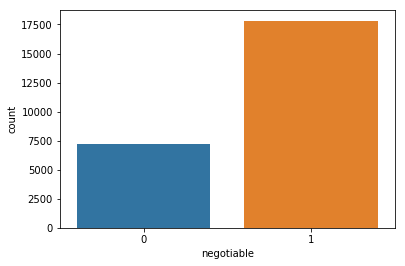

In [37]:
sns.countplot(x='negotiable',data=data)

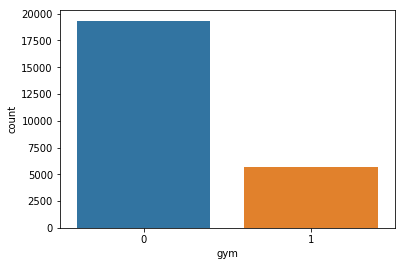

In [38]:
sns.countplot(x='gym',data=data)

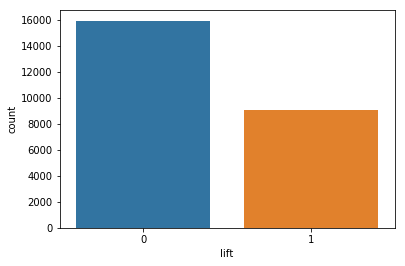

In [39]:
sns.countplot(x='lift',data=data)

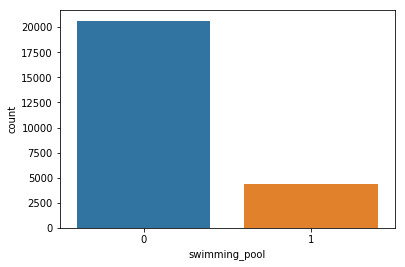

In [40]:
sns.countplot(x='swimming_pool',data=data)

In [41]:
#swimming pool present in approx 16% of property

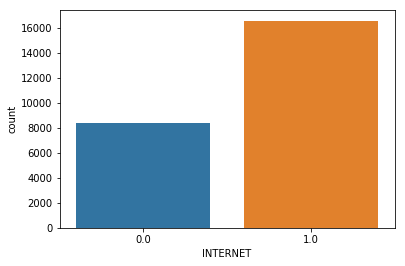

In [42]:
sns.countplot(x='INTERNET',data=data)

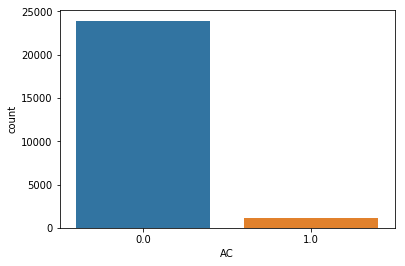

In [43]:
sns.countplot(x='AC',data=data)

In [44]:
#AC present in approx 4% of property

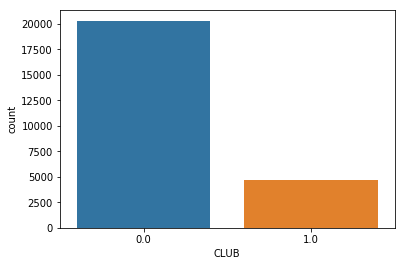

In [45]:
sns.countplot(x='CLUB',data=data)

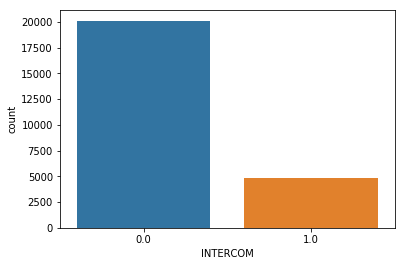

In [46]:
sns.countplot(x='INTERCOM',data=data)

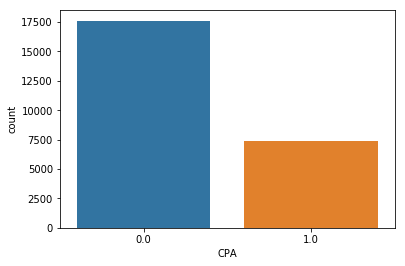

In [47]:
#CPA- COnsumer Protection Act decides whether property to given for residential or business purpose
sns.countplot(x='CPA',data=data)

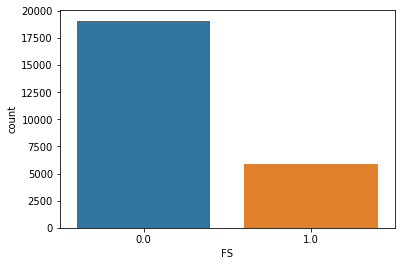

In [48]:
#FS-Full service (rental rates quoted with full service)
sns.countplot(x='FS',data=data)

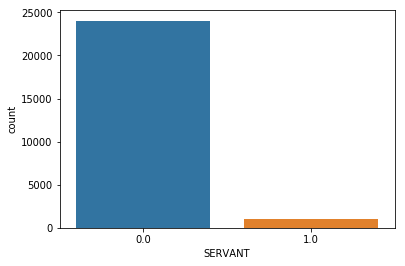

In [49]:
sns.countplot(x='SERVANT',data=data)

In [50]:
#Servant present in approx 4% of property
#drop this as initially also approx 5% null values were there in it

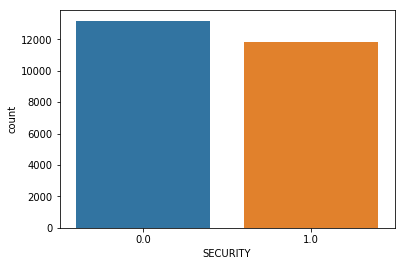

In [51]:
sns.countplot(x='SECURITY',data=data)

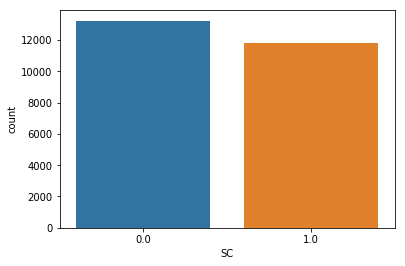

In [52]:
#SC- Settled possession of property
sns.countplot(x='SC',data=data)

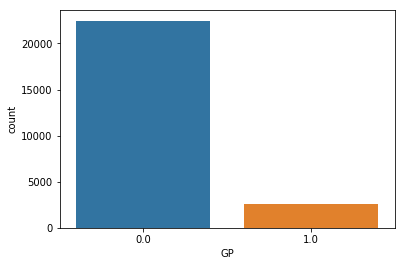

In [53]:
#GP-General Public Scheme Houses
sns.countplot(x='GP',data=data)

In [54]:
#GP present in approx 10% of property

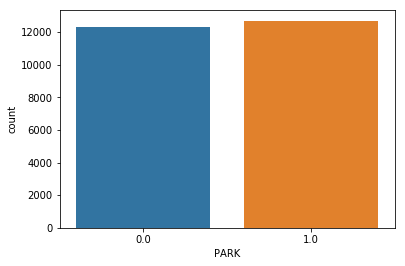

In [55]:
sns.countplot(x='PARK',data=data)

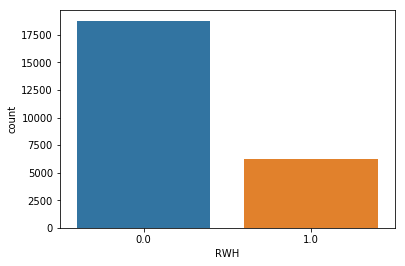

In [56]:
#RWH-Rainwater Harvesting System
sns.countplot(x='RWH',data=data)

In [57]:
#RWH present in approx 25% of property

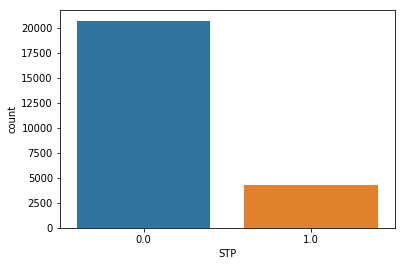

In [58]:
#STP-Sewage Treatment Plant
sns.countplot(x='STP',data=data)

In [59]:
#STP present in approx 15% of property

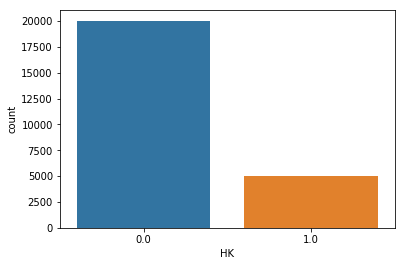

In [60]:
#HK-property tax by Hong Kong govn
sns.countplot(x='HK',data=data)

In [61]:
#HK present in approx 18% of property

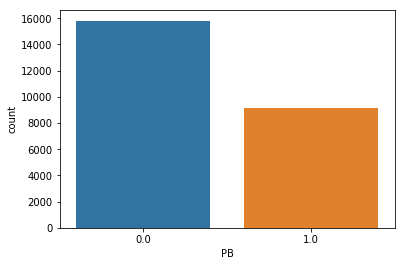

In [62]:
#PB- Property has offer but seller still looking for back-up offers
sns.countplot(x='PB',data=data)

In [63]:
#PB present in approx 36% of property

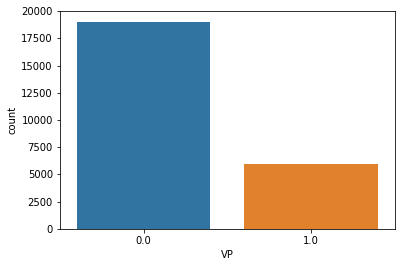

In [64]:
#VP-Vacanat Possession
sns.countplot(x='VP',data=data)

In [65]:
#VP present in approx 24% of property

DEVELOPING MODEL

In [66]:
#Linear Regression

In [67]:
#implementing Linear Regression without dropping any feature
X=data.drop(['rent','deposit'],axis=1)
Y=data['rent']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.1,random_state =10)

In [69]:
reg=LinearRegression()

In [70]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
pdt = reg.predict(X_test)

In [72]:
score = reg.score(X_test,y_test)
print(score*100)

65.90802103858617


In [73]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pdt))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pdt))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pdt)))  

Mean Absolute Error: 3709.6939929122022
Mean Squared Error: 25679547.911282428
Root Mean Squared Error: 5067.499177235496


In [74]:
#IMPROVING MODEL BY DROPPING SERVANT

In [75]:
X=data.drop(['SERVANT','rent','deposit'],axis=1)
Y=data['rent']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.1,random_state =10)

In [77]:
reg=LinearRegression()

In [78]:
reg.fit(X_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [79]:
pdt = reg.predict(X_test)

In [80]:
score = reg.score(X_test,y_test)
print(score*100)

70.50020156853101


In [81]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pdt))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pdt))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pdt)))  

Mean Absolute Error: 3421.903400028017
Mean Squared Error: 22220519.614056043
Root Mean Squared Error: 4713.8646155841225


In [82]:
#USING Z-SCORE FOR DETECTING AND CLEANING OUTLIERS

In [83]:
z = np.abs(stats.zscore(data))  #describing z score--abs used for making +ve values
print(z)

[[0.18835766 0.08798073 0.31401199 ... 0.49868715 0.76208775 0.55991796]
 [0.18835766 1.18309072 1.75900464 ... 0.49868715 0.76208775 0.55991796]
 [0.89966023 0.14597721 0.34456018 ... 0.49868715 1.31218485 0.55991796]
 ...
 [1.27637555 0.36234488 1.57581586 ... 0.49868715 0.76208775 0.55991796]
 [1.27637555 1.30393478 0.49207796 ... 0.49868715 0.76208775 0.55991796]
 [0.18835766 0.53633432 0.03071757 ... 0.49868715 1.31218485 0.55991796]]


In [84]:
threshold = 3
print(np.where(z > 3))

(array([    4,     5,    10, ..., 24972, 24972, 24981], dtype=int64), array([29,  9, 29, ..., 21, 24, 29], dtype=int64))


In [85]:
data.shape

(25000, 39)

In [86]:
#data= data[(z < 3).all(axis=1)] #to remove or filter the outliers and get the clean data.

In [87]:
data.shape

(25000, 39)

In [88]:
#Applying Linear Regression after removing outliers
x=data.drop(['rent','deposit','SERVANT'],axis=1)
y=data['rent']
x_train, x_test, y_train, y_test= train_test_split(x, y,test_size = 0.1, random_state = 10)


In [89]:
#lr=LinearRegression()
#lr.fit(x_train,y_train)

In [90]:
#pred=lr.predict(x_test)

In [91]:
#print(metrics.mean_absolute_error(y_test,pred))
#print(metrics.mean_squared_error(y_test,pred))
#print(np.sqrt(metrics.mean_squared_error(y_test,pred)))
#from sklearn.metrics import mean_squared_error, r2_score
#print('Variance score: %.2f' % r2_score(y_test, pred))# r2 score should be greater

In [92]:
#Thus, removing outliers did help to reduce mean absolute error

In [93]:
#USING RANDOM FOREST REGRESSOR MODEL

In [94]:
#dropping servant
x=data.drop(['rent','deposit','SERVANT'],axis=1)
y=data['rent']

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [96]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [97]:
clf = RandomForestRegressor(n_estimators=45)
clf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=45, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [98]:
score=clf.score(x_test,y_test)
print(score*100)

81.41518278727118


In [99]:
pred=clf.predict(x_test)

In [100]:
print(metrics.mean_absolute_error(y_test,pred))
print(metrics.mean_squared_error(y_test,pred))
print(np.sqrt(metrics.mean_squared_error(y_test,pred)))

2555.9221199999997
13377407.714760792
3657.5138707543942


In [101]:
df=pd.DataFrame({'Actual':y_test,'predicted':pred})
df.head(10)

,Actual,predicted
18339,24000,21377.777778
6182,18000,15406.666667
3788,20000,19233.333333
6958,40000,39244.444444
23107,10000,9988.888889
20367,40000,20644.444444
7218,42000,38488.888889
17931,10000,9922.222222
5828,8000,8377.777778
13112,26000,27688.888889


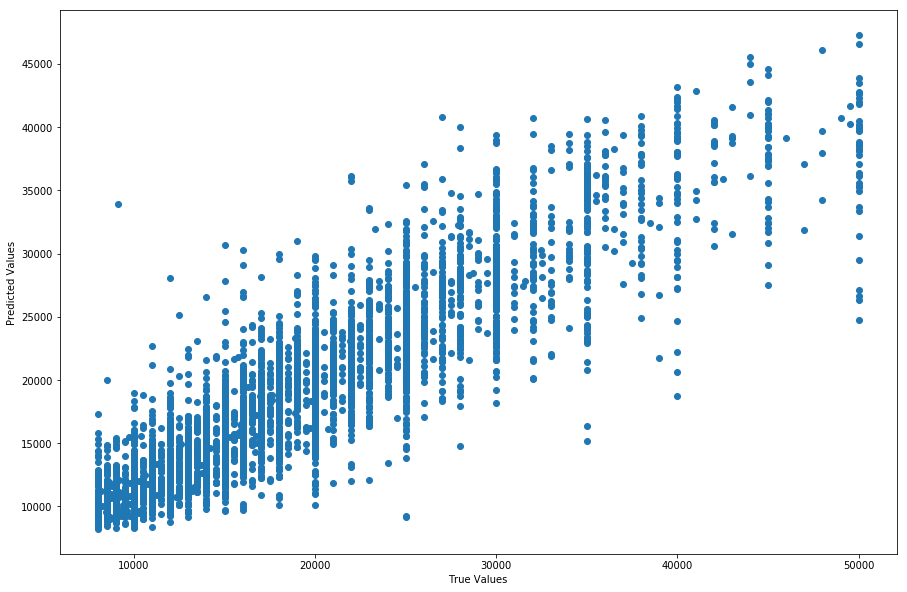

In [102]:
pt.figure(figsize=(15,10))
pt.scatter(y_test,pred)
pt.xlabel('True Values')
pt.ylabel('Predicted Values')
pt.show()

Thus, we get a maximum accuracy of 81.18% and mean absolute error of 2568.25 using Random Forest Regressor by dropping only deposit and SERVANT features and reatining all other features, thus providing maximum flexibility to features to customer.

In [103]:
import pickle

In [104]:
pickle.dump(clf,open('model.pkl','wb'))

In [105]:
model=pickle.load(open('model.pkl','rb'))